# 30회 스터디 합격자_평창
기계학습: 36.1/60  
통계분석: 40/40  
총 76.1/100
_______

#### 복기하면서 덧붙이고 싶은 말은 마크다운 볼드체로 적었습니다.

### packages

In [72]:
from IPython.display import display ,HTML
display(HTML("<style>.container {width :95% !important;}</style>"))

# 한글 그래프
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
import seaborn as sns

import pandas as pd
pd.set_option('display.max_columns',200)

#sample etc.
import numpy as np

#pca
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#t-test
from scipy.stats import ttest_ind


#modeling
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error


import warnings 
warnings.filterwarnings('ignore')


from imblearn.over_sampling import SMOTE
import xgboost as xgb
import scipy.stats as stats
import math
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## by datamanim

# 30회 ADP 복원 

# 기계학습 (60점)

In [6]:
import pandas as pd

## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv
- 데이터 설명 : 

In [109]:
#encoding = ['utf-8','cp949','utf-8-sig','euc-kr','latin']
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p1.csv',encoding= 'cp949')
df.head()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
0,26,1,20.1,81,5.80,4.36,0.86,0.90,2.43,12.0,63.8,5.40
1,40,1,17.7,54,4.60,3.70,1.02,1.50,2.04,9.2,70.3,4.10
2,40,2,19.7,53,5.30,5.87,1.29,1.75,3.37,10.1,61.1,4.85
3,43,1,23.1,71,4.50,4.05,0.74,1.27,2.60,36.5,73.4,5.30
4,36,1,26.5,82,5.54,6.69,3.49,0.91,3.64,69.3,67.5,5.53


## 1-1  EDA를 시행하라 

In [110]:
df.shape

(4303, 12)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     4303 non-null   int64  
 1   Gender  4303 non-null   int64  
 2   BMI     4303 non-null   float64
 3   DBP     4303 non-null   int64  
 4   FPG     4303 non-null   float64
 5   Chol    4302 non-null   float64
 6   Tri     4303 non-null   float64
 7   HDL     4303 non-null   float64
 8   LDL     4303 non-null   float64
 9   ALT     4303 non-null   float64
 10  CCR     4303 non-null   float64
 11  FFPG    4303 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 403.5 KB


In [112]:
df.describe()

,Age,Gender,BMI,DBP,FPG,Chol,Tri,HDL,LDL,ALT,CCR,FFPG
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4302.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,76.360446,5.226368,4.860732,1.588476,1.666765,2.976220,26.754810,71.557080,5.729084
std,14.686155,0.477530,3.397294,11.004056,0.781089,0.925484,1.260003,1.079377,0.892196,22.279922,16.937394,1.424568
min,22.000000,1.000000,15.600000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,4.860753,3.200000
25%,35.000000,1.000000,21.700000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,60.000000,4.900000
50%,46.000000,1.000000,24.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,72.000000,5.300000
75%,59.000000,2.000000,26.300000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,82.300000,6.020000
max,93.000000,2.000000,45.800000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,307.000000,29.700000


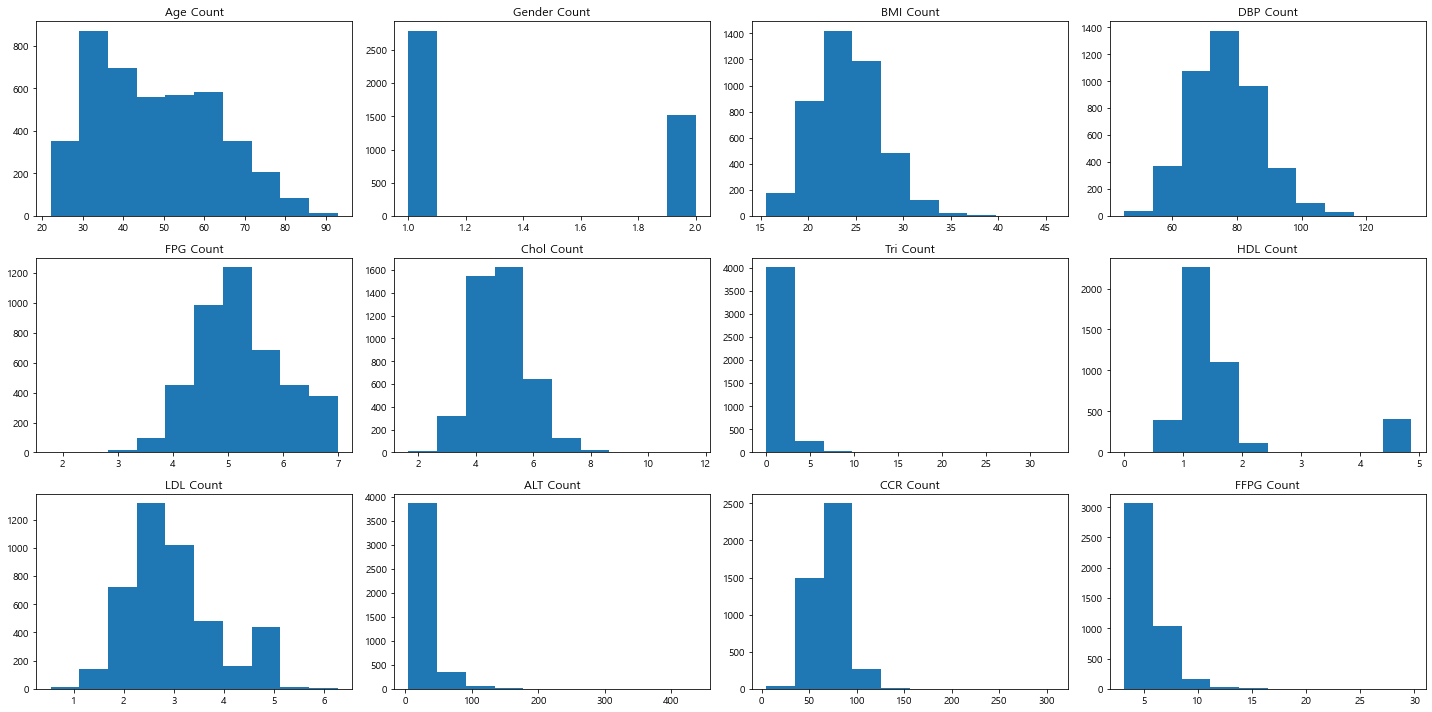

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt



def make_plot(df):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.select_dtypes(exclude=object).columns, start=1):
        plt.subplot(3,4,i)
        plt.title(f'{col} Count')
        plt.hist(df[col])
        start_num = i+1
    for i, col in enumerate(df.select_dtypes(include=object).columns, start=start_num):
        plt.subplot(3, 4, i)
        plt.title(f'{col} Count')
        sns.countplot(data=df, x=col)
    plt.tight_layout()
    plt.show()
    
make_plot(df)

주어진 데이터를 shape 함수로 12개의 컬럼, 4303개의 row 수라는 걸 확인했다.  
info 함수로 데이터 형식과 결측치를 확인해봤다. 모두 int 또는 float 형식이었다. Chol 컬럼에 하나의 결측치가 있다.  
describe 함수로 데이터의 사분위 수와 최소값, 최대값을 확인해보았다. Tri, ALT, CCR 등 몇개의 컬럼의 최대값이 3사분위 수 보다 매우 큰 값으로 여겨진다. 
make_plot라는 사용자 지정 함수를 만들어 각 컬럼의 히스토그램을 살펴보았다. gender 컬럼은 1과 2로 된 범주형 변수인 것을 확인할 수 있다. 또한 DPB, BMI 등 컬럼등은 정규분포와 유사한 모습을 보이지만, ALT, FFPG 등 컬럼은 오른쪽으로 꼬리가 긴 분포를 보인다. 그리고 각 컬럼의 히스토그램 플롯의 가로 축을 살펴보면 단위가 다른 것을 알 수 있다.

## 1-2 데이터 전처리가 필요하다면 수행하고 이유를 작성하라

#### 종속변수가 기억이 나지 않아서 임의로 'Gender'열을 종속변수로 지정하였습니다. 

- 결측치 처리   
    info 함수의 출력 결과를 통해 Chol 열에서 결측치가 있음을 확인했다. 수치형 데이터이므로 평균으로 대체한다.  
- 로그 변환  
     히스토그램 시각화 결과, ALT, FFPG 등 컬럼이 오른쪽으로 꼬리가 긴 분포를 가진다. 로그변환을 통해 데이터를 좀 더 정규분포의 형태로 변환시킨다.
- 이상치 처리  
    describe 함수의 출력 결과, ALT, CCR 컬럼등의 최대값이 제3사분위수 보다 매우 큰 값을 가지고 있다. iqr 방식으로 이상치를 제거한다.  
- 스케일링  
    각 컬럼의 히스토그램 플롯의 가로 축을 살펴보면 단위가 다른 것을 알 수 있다. 스케일링을 하여 범위를 맞춰줄 것이다. 종속변수와 독립변수를 분리하고 스케일링한다.

In [114]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 결측치 처리
df['Chol'] = df['Chol'].fillna(df['Chol'].mean())

# 로그변환
log_col = ['Tri', 'ALT', 'FFPG']
df[log_col] = np.log1p(df[log_col])

# 이상치 처리
def remove_iqr(df):
    for col in df.columns:
        iqr = np.quantile(df[col], 0.75) - np.quantile(df[col], 0.25)
        high = np.quantile(df[col], 0.75) + 1.5*iqr
        df = df[df[col] <= high]
    return df
df = remove_iqr(df)

# 스케일링

y = df['Gender']
x = df.drop(columns=['Gender'])
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

## 1-3 train test set을 DBP컬럼 기준으로 7:3 비율로 나누고 잘 나뉘었는지 통계적으로 나타내라

In [115]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=7)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


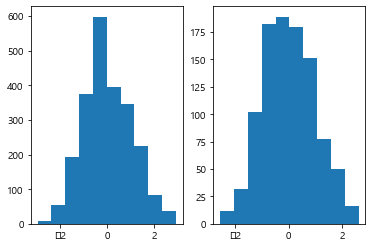

In [116]:
plt.subplot(1,2,1)
plt.hist(x_train['DBP'])
plt.subplot(1,2,2)
plt.hist(x_test['DBP'])
plt.show()

0.7 비율로 train 데이터와 test 데이터를 분리하였다. 그 후, 나누어진 train 데이터와 test 데이터의 dbp 컬럼을 히스토그램으로 시각화 하였다. 두 그래프가 비슷하게 정규분포의 모양을 보이는 것으로 데이터가 잘 분리되었다고 본다.

## 2-1 독립변수의 차원축소의 필요성을 논하고, 필요에 따라 차원을 축소하고 불필요하다면 그 근거를 논하시오.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


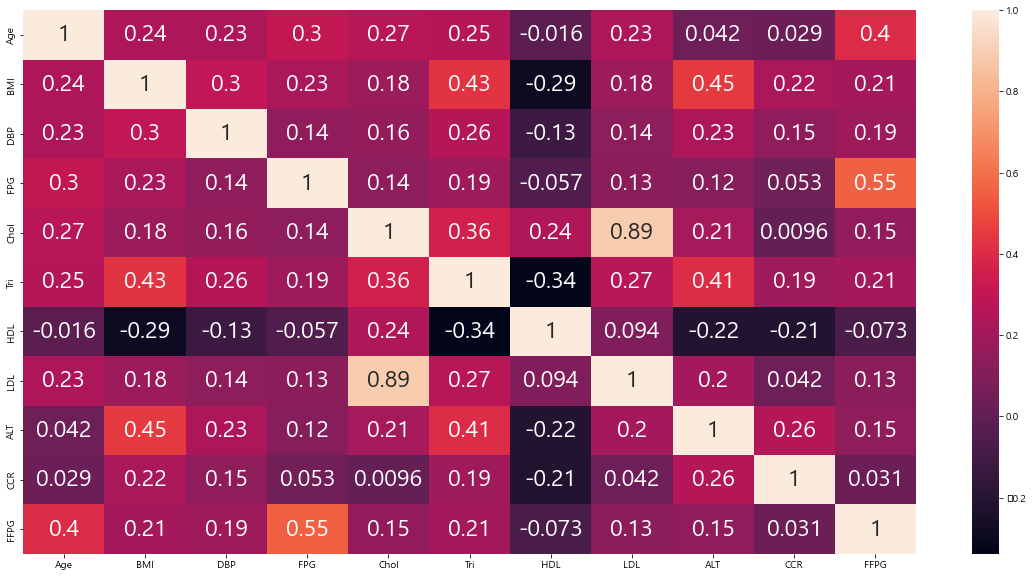

In [117]:
x.corr()
plt.figure(figsize=(20, 10)) 
sns.heatmap(x.corr(), annot=True, annot_kws={'size': 23})
plt.show()

상관성을 시각화 한 결과, LDL과 Chol의 상관계수가 0.7이상인 약 0.89로 높은 양의 상관을 갖는다. 학습 데이터에 높은 상관을 갖는 변수가 존재하면 모델의 다중공선성 문제가 발생할 수 있어 모델 성능에 안좋은 영향을 줄 수 있다. LDL과 Chol 중, chol을 삭제하여 차원을 축소한다. 

In [118]:
x = x.drop(columns = ['Chol'])

In [119]:
x.shape

(3303, 10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


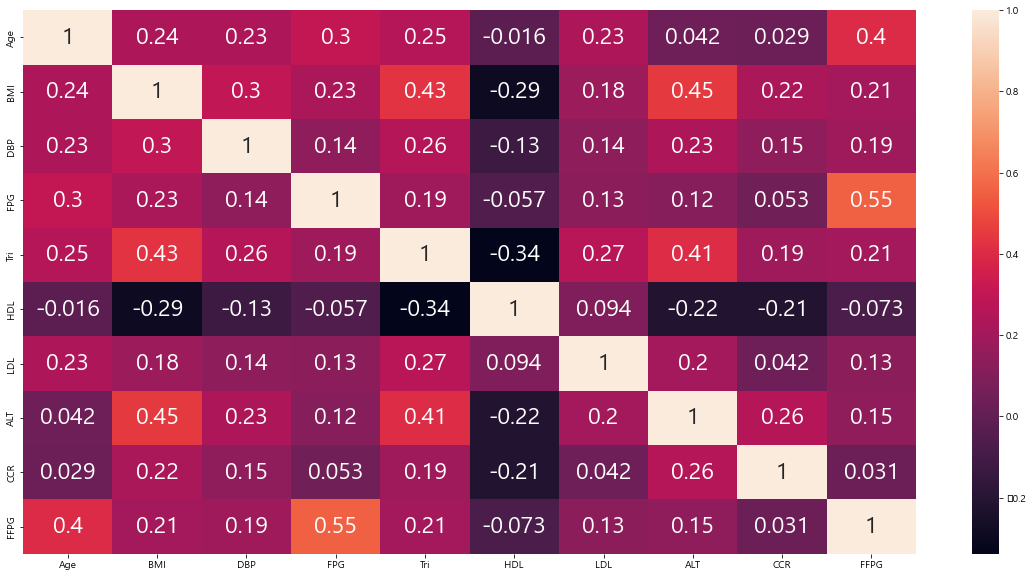

In [120]:
x.corr()
plt.figure(figsize=(20, 10)) 
sns.heatmap(x.corr(), annot=True, annot_kws={'size': 23})
plt.show()

Chol 컬럼을 삭제한 후 다시 상관계수를 확인한 결과 높은 상관성을 가진 변수 쌍은 보이지 않았다. Chol 컬럼 삭제 후 독립변수가 10개가 되었다. 모델을 학습하기에 적당한 변수 수라고 판단하고 주성분 분석 등 더이상의 차원축소는 하지 않는다.

## 2-2 2-1 작업 후 데이터가 회귀분석의 기본가정 따르는지 설명

0.7이상의 상관성을 보이는 컬럼 쌍이 없으니 회귀 기본 가정을 따른다고 할 수 있다.

## 3-1 회귀분석 알고리즘 3개를 선택하고 선정이유와 장단점 비교

#### 회귀가 아닌 분류함수로 풀어서 감점당했을 것입니다.

decisiontree 모델, randomforest 모델, lightgbm 모델을 선택하였다.  
1. decisiontree 모델
- 선정 이유: ml 알고리즘 중 가장 직관적으로 이해하기 쉬운 모델로서 지금과 같은 시험 또는 교육용으로 많이 사용하는 모델이라 선정하였다.
- 장점: 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.
- 단점: 과적합으로 정확도가 떨어질 수 있다. 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 가능성이 크다.
2. randomforest 모델
- 선정 이유: 배깅의 대표적인 알고리즘으로서 다양한 형태의 데이터에서 높은 예측성능을 보이는 장점이 있기 때문에 여러 방면의 영역에 널리 사용되는 알고리즘이라 선정하였다.  
- 장점: 랜덤포레스트의 기반 알고리즘은 결정 트리로서, 결정 트리의 쉽고 직관적인 장점을 그대로 가진다. 다양한 영역에서 높은 예측 성능을 보인다. 
- 단점: 하이퍼파라미터가 많고, 그로 인해서 튜닝을 위한 시간이 많이 소모된다. 더구나 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않다.
3. lightgbm 모델
- 선정 이유: 부스팅 계열 알고리즘에서 가장 각광받는 알고리즘이라 선정하였다.
- 장점: 기존의 부스팅 계열 알고리즘인 xgboost과 성능은 비슷하지만 학습에 걸리는 시간이 훨씬 적다. 또한 메모리 사용량도 상대적으로 적다.
- 단점: 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다.

## 3-2. 1-3에서 구분한 데이터를 기준으로 3개의 회귀 분석 모델링을 진행하고 평가지표 rmse로 가장 최적화된 알고리즘 선정

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

dt = DecisionTreeClassifier(random_state=123)
rf = RandomForestClassifier(random_state=123)
lgbm = LGBMClassifier(random_state=123)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=7)

dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
lgbm.fit(x_train, y_train)

dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)
lgbm_pred = lgbm.predict(x_test)

In [19]:
from sklearn.metrics import mean_squared_error
print('DecisionTree 모델의 rmse:',np.sqrt(mean_squared_error(y_test, dt_pred)))
print('RandomForest 모델의 rmse:',np.sqrt(mean_squared_error(y_test, rf_pred)))
print('LightGBM 모델의 rmse:',np.sqrt(mean_squared_error(y_test, lgbm_pred)))

DecisionTree 모델의 rmse: 0.39163812865236824
RandomForest 모델의 rmse: 0.2996802870898119
LightGBM 모델의 rmse: 0.3285905441600574


RandomForest 모델의 rmse가 약 0.3으로 가장 낮다. 따라서 RandomForest 모델을 선정한다.

#### 4-2~ 4-4문제는 4-1까지 푼 후, 시험종료까지 20분이 남아서 다급하게 풀어야했습니다. 그래서 마크다운도 못 적었던 것 같고, 4-2은 아예 빈칸으로 제출, 4-4 문제를 확인했을 때는 종료 10분도 안남아서 의미없는 코드를 몇개 적었던 것 같습니다. 그 코드는 기억이 나지 않습니다 ㅠ

## 데이터 설명
- 데이터 출처 : https://taas.koroad.or.kr/api/selectOpenApi.do 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv
- 데이터 설명 : 자전거사고 다발지역 개별사고 정보
1) 대상사고 : 해당 1년간 발생한 가해 또는 피해차종이 자전거인 교통사고
2) 다발지역 선정조건 : 반경 300m 내 대상사고 4건이상 발생지역

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p2.csv',encoding='cp949')
df.head()

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각
0,경상,여,75세,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15시
1,중상,여,26세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13시
2,중상,남,34세,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08시
3,경상,남,45세,자전거,경상,차대차 - 기타,맑음,0,2018-06-03 18시
4,중상,남,20세,자전거,중상,차대차 - 측면충돌,맑음,0,2018-06-28 16시


## 4-1 발생시각을 통해 평일인지 주말인지를 구분하는  '주말여부'  범주형 변수 추가하고 데이터 분포를 확인하라. (월 ~ 금은 평일, 토요일과 일요일을 주말)

In [86]:
df['발생시각'] = pd.to_datetime(df['발생시각'], format="%Y-%m-%d %H시")

In [87]:
# 일요일=6, 월요일=0
df['요일번호'] = df['발생시각'].dt.weekday
df['주말여부'] = '평일'
df.loc[df['요일번호']>=5,'주말여부'] = '주말'
df = df.drop(columns=['요일번호'])

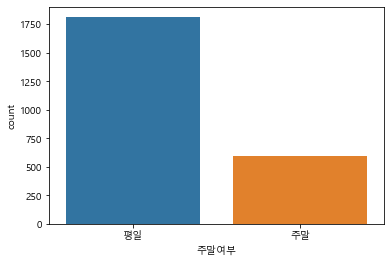

In [88]:
plt.rc('font', family = 'Malgun Gothic')
sns.countplot(x='주말여부',data=df)
plt.show()

주말 데이터 보다 평일 데이터가 많은 것을 확인할 수 있다.

## 4-2 주말여부에 따라 각 변수들(사고내용,가해자성별,가해자연령,기상상태,사고유형)이 유의한지 통계적 검정하라.

## 4-3 SMOTE 오버샘플링하고 변수별 빈도를 나타내고 연속형이면 평균을 내라

#### 종속변수가 기억나지 않아 '사고내용'열으로 설정하겠습니다.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   사고내용       2410 non-null   object        
 1   가해자성별      2400 non-null   object        
 2   가해자연령      2406 non-null   object        
 3   가해자차종      2410 non-null   object        
 4   피해자신체상해정도  2410 non-null   object        
 5   사고유형       2410 non-null   object        
 6   기상상태       2410 non-null   object        
 7   사망자수       2410 non-null   int64         
 8   발생시각       2410 non-null   datetime64[ns]
 9   주말여부       2410 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 188.4+ KB


In [90]:
df['가해자연령'].unique()

array(['75세', '26세', '34세', '45세', '20세', '78세', '51세', nan, '44세', '67세',
       '48세', '52세', '43세', '32세', '63세', '53세', '36세', '15세', '19세',
       '50세', '56세', '58세', '57세', '68세', '76세', '55세', '60세', '59세',
       '70세', '47세', '28세', '불명', '33세', '71세', '62세', '72세', '66세',
       '54세', '64세', '41세', '24세', '38세', '39세', '69세', '73세', '46세',
       '21세', '61세', '40세', '65세', '23세', '80세', '79세', '37세', '16세',
       '31세', '13세', '10세', '49세', '42세', '14세', '27세', '25세', '12세',
       '35세', '29세', '22세', '30세', '85세', '74세', '9세', '77세', '17세',
       '84세', '18세', '83세', '91세', '81세', '11세', '82세', '89세'],
      dtype=object)

In [91]:
df['가해자연령'] = df['가해자연령'].fillna("0세")
df.loc[df['가해자연령'] == '불명', '가해자연령'] = "0세" 
df['가해자연령'] = df['가해자연령'].str[:-1].astype(int)

df.loc[df['가해자연령'] == 0,'가해자연령'] = df['가해자연령'].median()

In [92]:
df.head(3)

,사고내용,가해자성별,가해자연령,가해자차종,피해자신체상해정도,사고유형,기상상태,사망자수,발생시각,주말여부
0,경상,여,75,자전거,경상,차대차 - 기타,맑음,0,2018-04-03 15:00:00,평일
1,중상,여,26,자전거,중상,차대차 - 측면충돌,맑음,0,2018-04-21 13:00:00,주말
2,중상,남,34,자전거,중상,차대차 - 기타,맑음,0,2018-05-01 08:00:00,평일


In [93]:
object_col = ['사고내용','가해자성별','가해자차종','피해자신체상해정도','사고유형','기상상태','주말여부']

In [94]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in object_col:
    df[col] = encoder.fit_transform(df[col])

In [95]:
x = df.drop(columns=['사고내용', '발생시각'])
y = df['사고내용']

In [96]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)

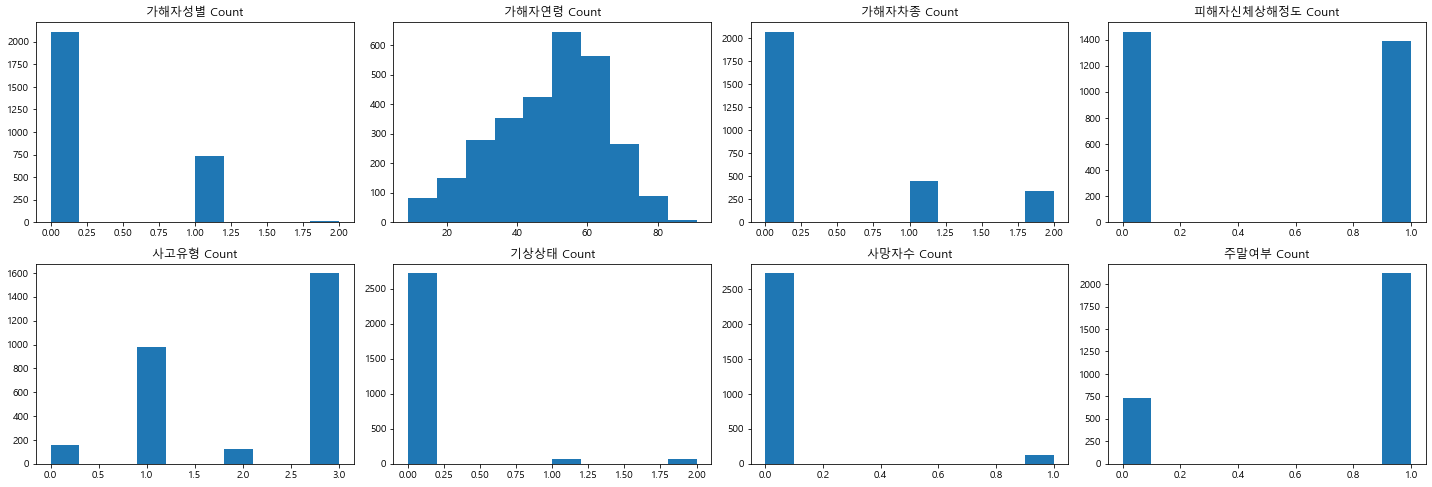

In [101]:
make_plot(x_sm)

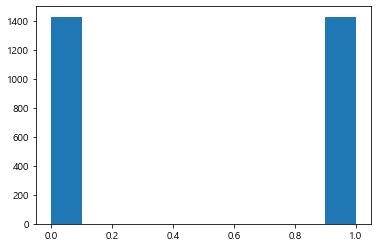

In [105]:
plt.hist(y_sm)
plt.show()

In [108]:
print('가해자연령 변수의 평균:',df['가해자연령'].mean())

가해자연령 변수의 평균: 49.65933609958506


## (정정) 종속변수는 사고내용이었습니다.
## (정정) 4-4 로지스틱회귀분석, XGB 분류모델을 이용하여 모델링하고, 영향도 있는 변수를 확인하기 (난수 1234, 단 기준변 변수 설정하기 eg) 차대사람, 날씨는 맑음 등)
 - 추가 적으로 둘중 어떤 모델이 더 분류를 잘하는지, 그리고 영향도있는 변수가 무엇인지 요구했던것같은데 기억이 희미하네요

# 통계 (40점)

## 5. 
3개의 공장에서 생산한 제품을 3지역으로 가능한 조건에 맞게 최대로 배송한다.    
각 공장과 각 지역 사이의 1개 제품 배송 비용이 아래와 같을 때, 최소 배송 비용은 얼마인가?    
![img](https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p5.png)

#### 제 기억에 따라 데이터를 다시 생성했습니다. 데이터가 기억나는 게 아니라 제 답변이 기억나서 그 답변에 맞춰 조작했고 그래서 데이터의 각 수치는 정확하지 않습니다. 기억에 세 공장의 최고비용의 지역이 모두 지역3은 아니였던 것 같습니다. 그리고 5번의 지문이 최소 배송 비용을 딱 구해야되는 게 아니라 "최소 배송을 위한 계획을 수립하시오."와 같이 서술형을 유도하는? 지문이었던 것 같습니다. (아닐 수도 있지만 저는 그렇게 문제를 인식하고 구구절절 풀이했던 것 같습니다.)   
#### 다른 응시자분께서 코드를 돌려서 최소비용을 계산한 값을 톡방에서 공유하셨는데 아마 그 값과 제 답이 달랐던 것 같습니다. 제 답은 2000보다 조금 적은 금액으로 기억합니다. (이 기억도 완전히 정확하진 않습니다 ㅠ)

In [38]:
pd.DataFrame({'지역1': ['20만원', '20만원', '3만원', 80],
              '지역2': ['5만원', '2만원', '22만원', 50],
              '지역3': ['35만원', '23만원', '15만원', 60],
             '총 생산량':[75, 55, 60, '']}, index=['공장A','공장B', '공장C', '총 수요량'])

,지역1,지역2,지역3,총 생산량
공장A,20만원,5만원,35만원,75
공장B,20만원,2만원,23만원,55
공장C,3만원,22만원,15만원,60
총 수요량,80,50,60,


공장a 지역3의 운송비가 35만원으로 전체 운송비용 중에서 가장 크다. 또한 공장B는 20만원인 지역2가, 공장C는 운송비가 17만원인 지역3이 지역 가장 큰 운송비 값을 가진다. 운송비 값이 큰 값만은 제외하여 운송 조건을 택하다보면 최적의 운동 비용을 도출할 수 있을 것이다.  
그리고 공장A와 공장B는 똑같이 지역3의 운송비가 가장 높다. 하지만 공장A가 35만원으로 공장비의 20만원보다 더 운송비 값이 높으므로, 공장A가 지역3을 배송하는 것만큼은 피하도록 조건을 고려한다.
그리고 공장A의 각 지역마다의 운송비를 살펴보면 20만원, 5만원 35만원으로, 다른 공장보다 지역별 가격차이가 크다. (설명:최고비용 - 최저비용이 공장a가 가장 크다는 것을 이렇게 표현했음) 따라서 공장A는 지역2를 선택하는 것이 가장 합리적이다. 먼저 공장a의 제일 작은 운송비인 지역3(5만원)부터 조건을 채우고 남은 생산량은 지역1(지역3을 피하기 위해)로 배치한다.

- 공장A 조건: 지역1에 25개, 지역2에 50개, 지역3에 0개 배송.  

공장B와 공장C 중에서 공장B는 최소비용 2만원인 지역2를 제외한 두 지역의 차이(3만원)가 공장 C의 경우(7만원)보다 적다. 공장 B는 지역2를 선택할 때 지역3에 대한 기회비용이 공장C가 지역3을 선택할 때 지역2에 대한 기회비용보다 더 적다. 따라서 공장C가 지역2을 배송하는 것을 피하는 것을 우선으로 두고 조건을 만족시킨다. 먼저 지역1의 남은 수요량 55개를 모두 공장C로 배치한다. 공장C의 남은 생산량 5개는 지역3으로 배치한다. 

- 공장C 조건: 지역1에 55개, 지역2에 0개, 지역3에 5개 배송.

공장C의 조건을 충족시킨 후, 남은 조건은 지역3의 55개이다. 남은 조건인 공장B의 생산량 모두 지역3에 배송시키도록 조건을 설정한다.  

- 공장B 조건: 지역1에 0개, 지역2에 0개, 지역3에 55개 배송.

In [121]:
공장a비용 = 20*25 + 5*50 + 35*0
공장b비용 = 20*0  + 2*0  + 23*55
공장c비용 =  3*55 + 22*0 + 15*5
공장a비용+공장b비용+공장c비용

2255

최소비용: 2255만원

## 데이터 설명
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv
- 데이터 설명 : 3개 연령층 (청년 장년 노년)의 A 헤드셋의 선호도 (1,2,3) 설문조사

In [123]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/30/p6.csv')
df.head()

,나이,선호도
0,청년,2
1,장년,2
2,청년,2
3,청년,1
4,장년,1


## 6.1 연령대별로 헤드셋 선호도에 차이가 있는지를 검정하기 위한 귀무가설과 연구가설을 설정해라.

귀무가설: 연령대별로 헤드셋 선호도에 차이가 없다.  
연구가설: 연령대별로 헤드셋 선호도에 차이가 있다.(헤드셋 선호도에 차이가 있는 연령대 그룹이 1 쌍 이상 있다.)

## 6.2 유의수준 하에서 통계 검정해라

설명변수가 범주형이니 카이제곱 독립성 검정을 실시한다. 데이터의 등분산성, 정규성은 만족한다고 가정한다.

In [50]:
# 분할표로 데이터 재정의
crosstab_df = pd.crosstab(index=df['나이'], columns=df['선호도'])
crosstab_df

선호도,1,2,3
나이,,,
노년,35,32,25
장년,25,23,17
청년,47,44,29


In [55]:
from scipy.stats import chi2_contingency
chi, p, df, _ = chi2_contingency(crosstab_df)
chi2_contingency(crosstab_df)
print('카이제곱 통계량:', chi)
print('p-value:', p)

카이제곱 통계량: 0.26510760957453305
p-value: 0.9919538273457956


카이제곱 통계량은 약 0.27, p-value 값은 약 0.99이다. p-value 값이 유의수준 0.05보다 크므로 귀무가설을 기각하지 못하고 채택한다.  
즉, 유의수준 0.05 하에 연령대별로 헤드셋 선호도에 차이가 있다고 말할 수 없다. 

#### 7번은 소수점 x자리에서 반올림해야되는 조건이 있던 것 같습니다

## 데이터 설명
아이를 6명 가진 가정이 5 가족이고, 아들/딸을 출생할 확률은 0.5이다.

## 7.1 딸이 4명 이상인 가구가 3 가족 이상일 확률을 구하라.

딸이 4명 이상일 확률을 구하고 그 확률이 5가족 중 3가족 이상일 확률을 구한다.   
먼저 어떤 가족이 자녀 6명 중, 딸이 4명 이상일 확률을 구한다.

In [61]:
from scipy.stats import binom
n = 6  # 시행 횟수
p = 0.5 # 자녀가 딸일 확률

# (1) 한 가족이 자녁 6명 중, 딸이 4명 이상일 확률
d_p = sum(binom.pmf(i, n, p) for i in range(4,7))
d_p

0.34375

이제 이 확률(d_p)가 5가족 중, 3가족 이상일 확률을 구한다.

In [68]:
ans = round(sum(binom.pmf(i, n, d_p) for i in range(3,6)), 3)
ans

0.339

정답: 0.339

## 7.2 5가족 중 몇 가족이 4명 이상 딸을 가질 것으로 기대할 수 있는가? 

4명이상 딸을 가질 확률은 아까 구한 d_p이다. 
이 확률에 가족 수인 5를 곱하여 5가족 중 4명 이상 딸을 가질 가족 수의 기대값을 구한다.

In [64]:
d_p*5

1.71875

정답: 약 1.72 가족

created by datamanim [web-link](https://www.datamanim.com)